## Event detection with kinematic data
based on Hreljac and Marshall 2000, Algorithms to determine event timing during normal walking using
kinematic data.<br/> 
Journal of Biomechanics 33 (2000) 783-786


Left heel markers have to be labelled LHEE<br/>
Left toe markers have to be labelled LTOE ...

In [4]:
# Input: import c3d files
import ezc3d
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

c = ezc3d.c3d('data_file_name.c3d')
freq=c['parameters']['POINT']['RATE']['value'][0];  # sample frequency
frames=c['parameters']['POINT']['FRAMES']['value'][0]; # number of frames
markerList=(c['parameters']['POINT']['LABELS']['value']);  
print(markerList) # Print all labels

ml1=[i for i,item in enumerate(markerList) if "LHEE" in item]  #find LHEE, marker of interest
mr1=[i for i,item in enumerate(markerList) if "RHEE" in item]
ml2=[i for i,item in enumerate(markerList) if "LTOE" in item]
mr2=[i for i,item in enumerate(markerList) if "RTOE" in item]

point_data=c['data']['points']

['LFHD', 'RFHD', 'LBHD', 'RBHD', 'C7', 'T10', 'STRN', 'CLAV', 'RBAK', 'LSHO', 'LELB', 'LWRA', 'LWRB', 'RSHO', 'RELB', 'RWRA', 'RWRB', 'LASI', 'RASI', 'LPSI', 'RPSI', 'LTHI', 'RTHI', 'LKNE', 'RKNE', 'LTIB', 'RTIB', 'LANK', 'RANK', 'LHEE', 'RHEE', 'RTOE', 'LTOE']


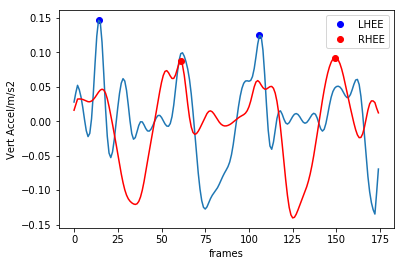

LHS at frames: [ 14 106]
RHS at frames: [ 61 149]


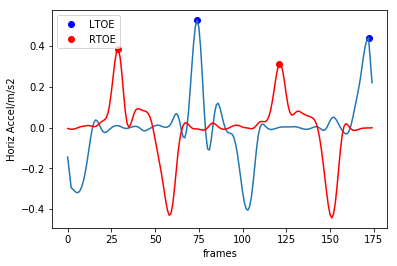

LTO at frames: [ 74 172]
RTO at frames: [ 29 121]


In [5]:
# Hreljac et al., 2000. 
# Heel strike (HS) determined by peak vertical acceleration of the heel marker
# Toe off (TO) determined by peak horizontal acceleration of the toe marker

t=np.arange(0,frames*0.01,1/freq) # time
x=np.arange(0,frames,1) # frames

LHEE = point_data[0:3, ml1[0], :] 
RHEE = point_data[0:3, mr1[0], :] 

LHEE_vel_z = np.gradient(LHEE[2]/1000, 1/freq) # vertical vel
LHEE_acc_z = np.gradient(LHEE_vel_z)
RHEE_vel_z = np.gradient(RHEE[2]/1000, 1/freq) 
RHEE_acc_z = np.gradient(RHEE_vel_z)

LHEE_peaks, _ = find_peaks(LHEE_acc_z, prominence=0.1, distance=80)      
RHEE_peaks, _ = find_peaks(RHEE_acc_z, prominence=0.1, distance=80)      
lhee, = plt.plot(LHEE_peaks, LHEE_acc_z[LHEE_peaks], "ob", label="LHEE"); plt.plot(x,LHEE_acc_z); 
rhee, = plt.plot(RHEE_peaks, RHEE_acc_z[RHEE_peaks], "or", label="RHEE"); plt.plot(x,RHEE_acc_z,'r'); 
plt.legend(handles=[lhee,rhee])
plt.ylabel('Vert Accel/m/s2')
plt.xlabel('frames')
plt.show()
print('LHS at frames: %s' % (LHEE_peaks))
print('RHS at frames: %s' % (RHEE_peaks))

LTOE = point_data[0:3, ml2[0], :] 
RTOE = point_data[0:3, mr2[0], :] 

LTOE_vel_x = np.gradient(LTOE[0]/1000, 1/freq) # horizontal vel
LTOE_acc_x = np.gradient(LTOE_vel_x)
RTOE_vel_x = np.gradient(RTOE[0]/1000, 1/freq)
RTOE_acc_x = np.gradient(RTOE_vel_x)

LTOE_peaks, _ = find_peaks(LTOE_acc_x, prominence=0.2, distance=80)      
RTOE_peaks, _ = find_peaks(RTOE_acc_x, prominence=0.2, distance=80)      
ltoe, = plt.plot(LTOE_peaks, LTOE_acc_x[LTOE_peaks], "ob", label="LTOE"); plt.plot(x,LTOE_acc_x)
rtoe, = plt.plot(RTOE_peaks, RTOE_acc_x[RTOE_peaks], "or", label="RTOE"); plt.plot(x,RTOE_acc_x,'r') 
plt.legend(handles=[ltoe,rtoe])
plt.ylabel('Horiz Accel/m/s2')
#plt.xlabel('time/s')
plt.xlabel('frames')
plt.show()
print('LTO at frames: %s' % (LTOE_peaks))
print('RTO at frames: %s' % (RTOE_peaks))
